In [1]:
import random
import itertools
import numpy as np
import pandas as pd
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
start_date = dt.datetime(2022, 1, 1)
end_date = dt.datetime(2025, 2, 24)

tickers = ['AAPL','MSFT','F','BAC','NKE','V','DIS']

n_tickers_selected = 4
n_combinations = 20

sampled_combinations = random.sample(list(itertools.combinations(tickers, n_tickers_selected)), n_combinations)

In [26]:
all_portfolios = []

for combination in sampled_combinations:
    data = yf.download(list(combination), start= start_date, end = end_date, progress= False)["Close"]
    returns = data.pct_change().dropna()
    covariance_matrix = returns.cov()

    annual_returns = returns.mean() * 252
    annual_cov = covariance_matrix * 252

    # Numero de simulaciones de ponderaciones
    num_portafolios = 1000

    weights_array = np.zeros((num_portafolios, n_tickers_selected))

    returns_array = np.zeros(num_portafolios)
    risk_array = np.zeros(num_portafolios)

    for i in range(num_portafolios):
        # generas los pesos aleatorios para cada portafolio
        weights_array[i] = np.random.random(n_tickers_selected)
        weights_array[i] = weights_array[i] / np.sum(weights_array[i])

        # obteniendo rendimiento y volatilidad esperada anual por portafolio
        portfolio_return = np.dot(annual_returns, weights_array[i])
        portfolio_risk = np.sqrt(np.dot(weights_array[i].T, np.dot(annual_cov, weights_array[i])))

        # guardando historicos
        weights_array[i, :] = weights_array[i]
        returns_array[i] = portfolio_return
        risk_array[i] = portfolio_risk

    portfolios = pd.DataFrame({
        "Returns": returns_array,
        "Risk": risk_array
    })

    for i, symbol in enumerate(combination):
        portfolios[symbol + " Weight"] = weights_array[:, i]

    all_portfolios.append(portfolios)

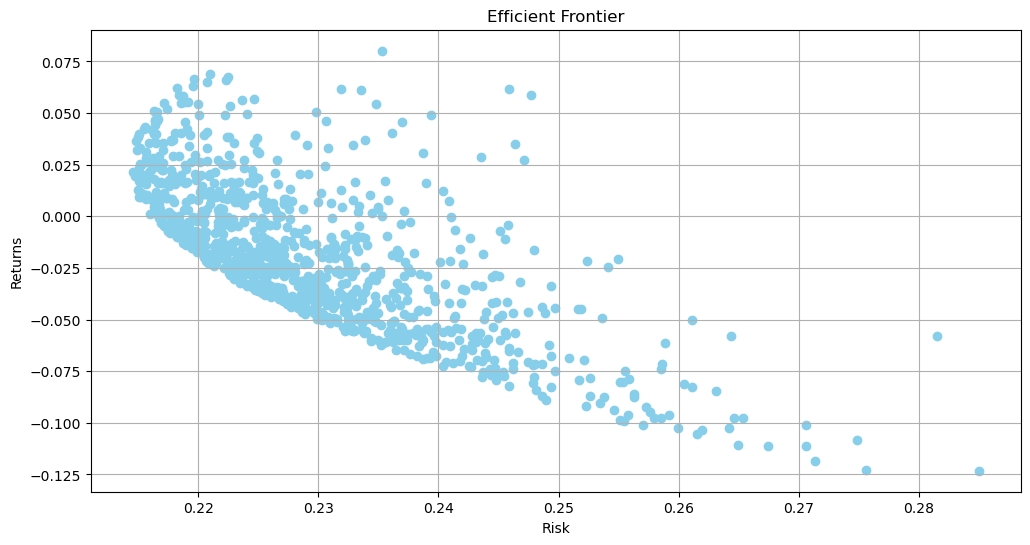

In [27]:
plt.figure(figsize=(12,6))
plt.scatter(all_portfolios[5]['Risk'], all_portfolios[5]['Returns'], c = 'skyblue')

plt.xlabel('Risk')
plt.ylabel('Returns')
plt.title('Efficient Frontier')
plt.grid();